<a href="https://colab.research.google.com/github/EvaCarol/SpotifyData/blob/main/spotify_dashboard_upload_manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎧 Spotify Top Hits (2000–2019) – Dashboard Exploratório
Este notebook explora o dataset com as músicas mais populares do Spotify entre 2000 e 2019, fornecendo visualizações e análises úteis para entender os padrões musicais ao longo do tempo.

In [ ]:
# Instalar bibliotecas necessárias
!pip install pandas matplotlib seaborn

In [ ]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Fazer upload do arquivo CSV
from google.colab import files
uploaded = files.upload()

In [ ]:
# Carregar o dataset
df = pd.read_csv("kagglespotify.zip", encoding="ISO-8859-1")
df.head()

## 🔍 Informações gerais do dataset

In [7]:
sns.set(style="whitegrid")
print("Formato do dataset:", df.shape)
print("\nColunas disponíveis:", df.columns)
print("\nInformações gerais:")
print(df.info())

Formato do dataset: (2000, 18)

Colunas disponíveis: Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   

## 🎵 Gêneros Mais Populares

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


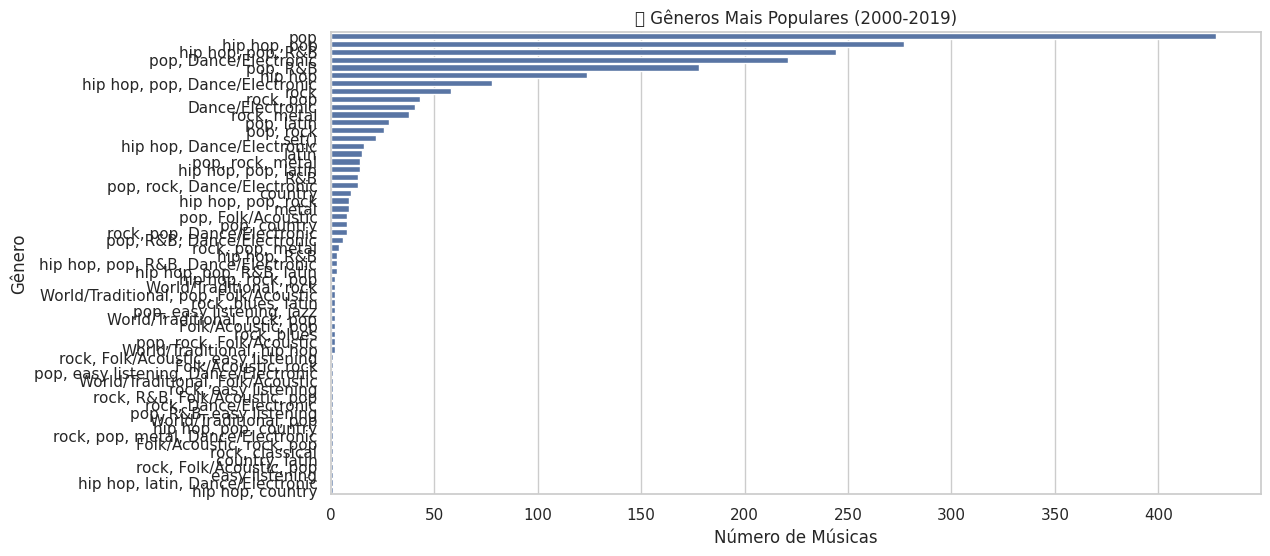

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y="genre", order=df["genre"].value_counts().index)
plt.title("🎶 Gêneros Mais Populares (2000-2019)")
plt.xlabel("Número de Músicas")
plt.ylabel("Gênero")
plt.show()

## 📈 Número de Músicas por Ano

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


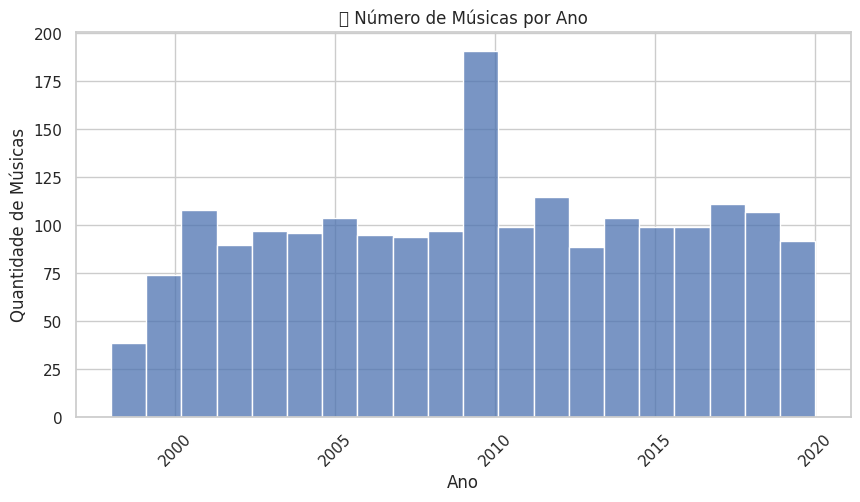

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="year", bins=20, kde=False)
plt.title("📅 Número de Músicas por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Músicas")
plt.xticks(rotation=45)
plt.show()

## 👨‍🎤 Artistas com Mais Músicas

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


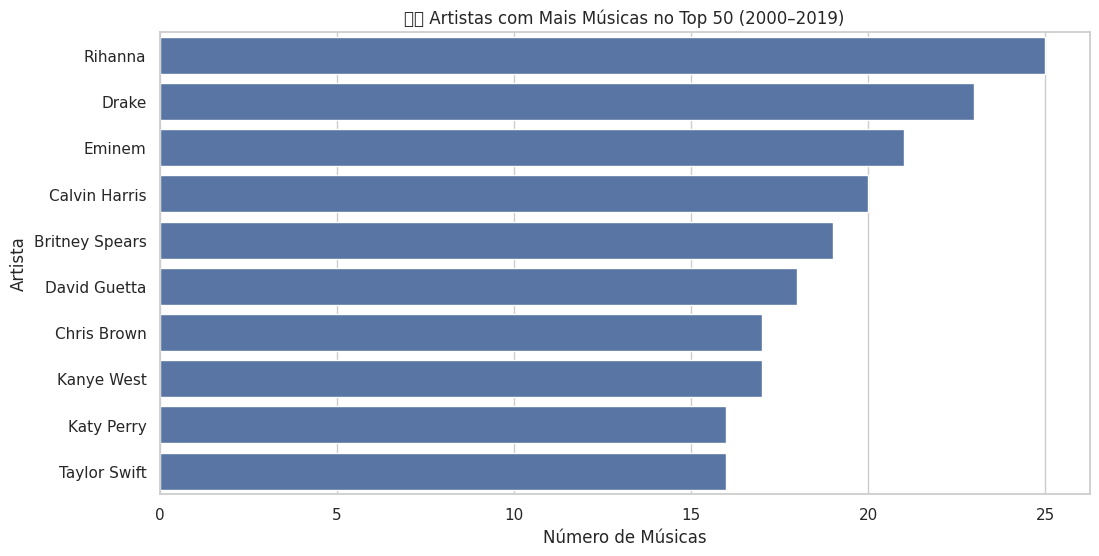

In [16]:
top_artists = df['artist'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("👨‍🎤 Artistas com Mais Músicas no Top 50 (2000–2019)")
plt.xlabel("Número de Músicas")
plt.ylabel("Artista")
plt.show()

## 🎧 Artistas Mais Ouvintes (Popularidade Média)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


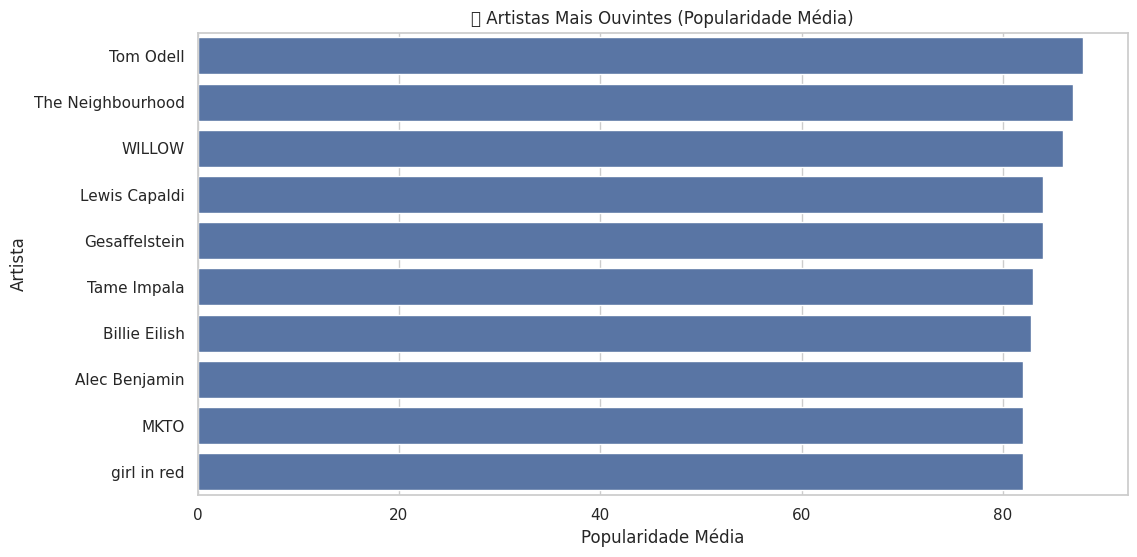

In [18]:
top_listened = df.groupby("artist")["popularity"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_listened.values, y=top_listened.index)
plt.title("🎧 Artistas Mais Ouvintes (Popularidade Média)")
plt.xlabel("Popularidade Média")
plt.ylabel("Artista")
plt.show()

## 🔁 Correlação entre Variáveis Numéricas

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


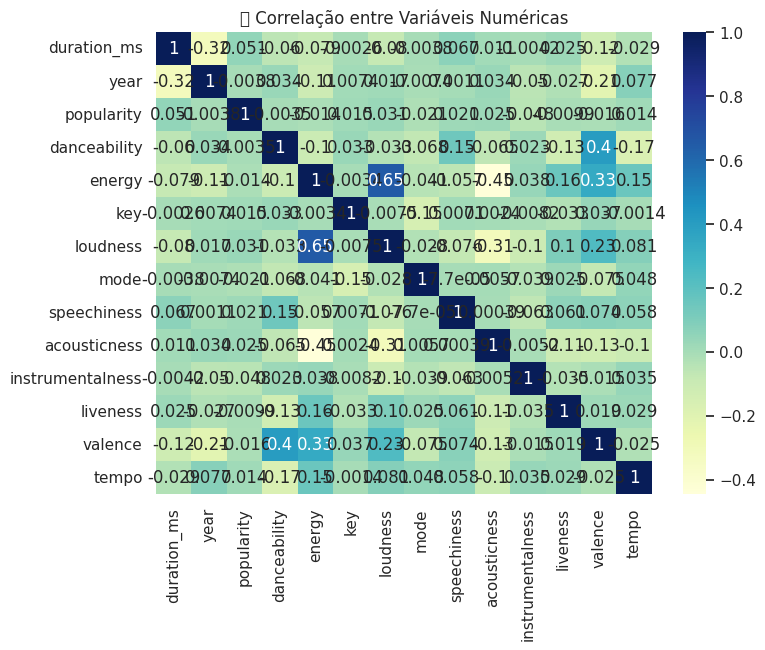

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="YlGnBu")
plt.title("🔗 Correlação entre Variáveis Numéricas")
plt.show()

In [10]:
print(df.columns)


Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')
